 ## **Long Short Term Memory (LSTM)**

In Neural Networks, Long Short Term Memory (LSTM) is a derivation of a Recurrent Neural Network (RNN). The main idea of this type of network is to preserve information along of the time, using a kind of memory and be capable of learning long term-dependencies. 

While RNN has loops to persist information, along time, the problem of the vanishing gradient comes out (see [Vanishing Gradient problems](https://pdfs.semanticscholar.org/e9fa/c1091d9a1646314b1b91e58f40dae3a750cd.pdf)), and to remember the data for long periods become a challenge that LSTM can solve. 

In this example, we will use a sample of Time Series of temperature collected at one of Brazil's weather stations. The data is avaliabe in [GitLab](https://gitlab.com/franciellemdn/course-deep-learning) named "temp.csv". 

We have two options, save the folder course-deep-learning at Google Drive and read the archieve from Google Drive, or we can save the archieve in our local drive and upload, oth forms are described below, please, pick one.

## Hands on

In [0]:
# Adding libraries 
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10,mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,LSTM
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import math
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


Choose one option

In [0]:
#OPTION 1

#open archieve from Local Drive

#from google.colab import files
#uploaded = files.upload()

#dataset = pd.read_csv(io.BytesIO(uploaded['temp.csv']),usecols=[3],delimiter=';')
#print(dataset.head())

In [19]:
#OPTION 2 
#open archieve from Google Drive 

from google.colab import drive 
drive.mount('/content/gdrive')
dataset = pd.read_csv('gdrive/My Drive/temp.csv',usecols= [3],delimiter = ';')
print(dataset.head())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
    Temp
0  26.54
1  26.46
2  25.20
3  26.40
4  25.16


In [0]:
epochs = 10
percentage = 0.8 #split 80% for train and 20% for test


### Loading Data



In [0]:
def create_dataset(dataset,look_back=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-look_back-1):
         a = dataset[i: (i + look_back), 0] #collection given data
         dataX.append(a) #stores in list
         dataY.append(dataset[i + look_back, 0]) # collect data for answer Y
         #print 'X', a, 'Y', dataset [i + look_back, 0]
         # lookback = look back * look at data pattern Y becomes X, always returning one step back
         ''' X [ 0.01544401] Y 0.027027
            X [ 0.02702703] Y 0.0540541
            X [ 0.05405405] Y 0.0482626
            X [ 0.04826255] Y 0.0328185
            X [ 0.03281853] Y 0.0598456
            X [ 0.05984557] Y 0.0849421
            X [ 0.08494207] Y 0.0849421
            X [ 0.08494207] Y 0.0617761
            X [ 0.06177607] Y 0.0289575'''
        
        
    #print 'Data X\n',dataX #[array([ 0.40733591], dtype=float32),
    #print 'Data Y\n',dataY #[0.027027026, 0.054054052, 0.048262551
    return np.array(dataX),np.array(dataY)


### Normalizing Data

In [0]:

dataset['Temp'] = dataset['Temp'].astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
values = scaler.fit_transform(dataset)  #array numpy [n_samples, n_features_new]


### Split Train and Test

In [23]:
n_train = int(percentage * values.shape[0])
n_test = n_train - values.shape[0]

train = values[:n_train,:]
test = values[n_train:,:]

look_back = 1
X_train, y_train = create_dataset(train,look_back) #create set of data to train
X_test,y_test  = create_dataset(test,look_back) #create set of data to test

print('Before Reshape',X_train.shape)

X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

print('After Reshape',X_train.shape)

Before Reshape (287, 1)
After Reshape (287, 1, 1)


### Why is it necessary to reshape?

### LSTM Model

In [0]:
model = Sequential()

##### Input Layer

In [0]:
model.add(LSTM(32, return_sequences=True, input_shape=(1,look_back)))  # returns a sequence of vectors of dimension 32

##### Hiden Layers


In [0]:
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32

##### Output Layer

In [0]:
model.add(Dense(1))

### Summary


In [28]:
model.summary () #Responsible for summarizing the layers added in Model and the output dimension of each one and number of generated parameters


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 32)             4352      
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


### Compile

In [0]:
model.compile(loss='mean_absolute_error',
              optimizer='rmsprop')

### Training


In [30]:
model.fit(X_train, y_train,
          batch_size=1, epochs=epochs,verbose=2)

Train on 287 samples
Epoch 1/10
287/287 - 5s - loss: 0.1457
Epoch 2/10
287/287 - 1s - loss: 0.1039
Epoch 3/10
287/287 - 1s - loss: 0.0936
Epoch 4/10
287/287 - 1s - loss: 0.0902
Epoch 5/10
287/287 - 1s - loss: 0.0918
Epoch 6/10
287/287 - 1s - loss: 0.0919
Epoch 7/10
287/287 - 1s - loss: 0.0891
Epoch 8/10
287/287 - 1s - loss: 0.0899
Epoch 9/10
287/287 - 1s - loss: 0.0905
Epoch 10/10
287/287 - 1s - loss: 0.0895


### Predict

In [31]:
#make predictions 
trainPredict = model.predict(X_train) 
testPredict = model.predict(X_test)
#invert predictions 
trainPredict = scaler.inverse_transform(trainPredict)

y_train = scaler.inverse_transform([y_train])

testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
#calculate root mean squared error 

trainScore = math.sqrt(mean_squared_error(y_train[0],trainPredict[:,0]))

# RMSE predicted by a model or an estimator and the values actually observed
print ('Train Score: %.2f RMSE'%(trainScore))

testScore = math.sqrt(mean_squared_error(y_test[0],testPredict[:,0]))

print ('Test Score: %.2f RMSE'%(testScore))

Train Score: 1.20 RMSE
Test Score: 1.39 RMSE


### Looking results

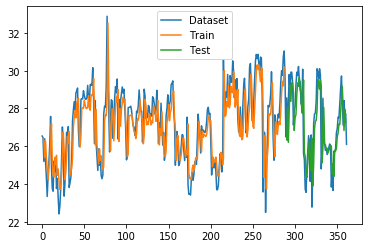

In [32]:
#shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

#shift test predictions for plotting 

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict

#plot baseline and predictions

plt.plot(scaler.inverse_transform(values),label='Dataset')
plt.plot(trainPredictPlot,label='Train')
plt.plot(testPredictPlot,label='Test')
plt.legend()
plt.show()

### Homework

Tune the hyperparameters to decrease the RMSE Score. 
Experiment with the network architecture, try changing the numbers, types, and sizes of layers, adding or removing layers. 

##Some References and Additional Readings
* Christopher Olah Blog's [Understanding LSTM](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

* Shi Yan Blog's [Understanding LSTM and its diagrams](https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714)

* Machine Learning Mastery [Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras
](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

* Paper [Long Short Term Memory](http://www.bioinf.jku.at/publications/older/2604.pdf)

* Paper [Learning Long-Term Dependencies with Gradient Descent is Difficult](http://ai.dinfo.unifi.it/paolo//ps/tnn-94-gradient.pdf)




